In [ ]:
# Study: Boston Housing - Neural Networks and Deep Learning Fundamentals
# Author: Willian Oliveira
# Start: 14/10/2022
# Motivation: Answer to the first challenge of the discipline
# Study Status: On going

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd  
import seaborn as sns
from sklearn.datasets import load_boston
import os
import random

SEED = 13

def set_seeds(seed=SEED):
    os.environ['PYTHONHASHSEED'] = str(seed)
    random.seed(seed)
    #tf.random.set_seed(seed)
    np.random.seed(seed)

def set_global_determinism(seed=SEED):
    set_seeds(seed=seed)

    os.environ['TF_DETERMINISTIC_OPS'] = '1'
    os.environ['TF_CUDNN_DETERMINISTIC'] = '1'
    
    #tf.config.threading.set_inter_op_parallelism_threads(1)
    #tf.config.threading.set_intra_op_parallelism_threads(1)

set_global_determinism(seed=SEED) # Setting seed for a reproducible code.

In [2]:
boston_dataset = load_boston()
print(boston_dataset.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])


c:\Users\Willian Oliveira\anaconda3\envs\dl_env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the Califo

In [3]:
print(boston_dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [4]:
df = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
df.head().style

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.006320,18.000000,2.310000,0.000000,0.538000,6.575000,65.200000,4.090000,1.000000,296.000000,15.300000,396.900000,4.980000
1,0.027310,0.000000,7.070000,0.000000,0.469000,6.421000,78.900000,4.967100,2.000000,242.000000,17.800000,396.900000,9.140000
2,0.027290,0.000000,7.070000,0.000000,0.469000,7.185000,61.100000,4.967100,2.000000,242.000000,17.800000,392.830000,4.030000
3,0.032370,0.000000,2.180000,0.000000,0.458000,6.998000,45.800000,6.062200,3.000000,222.000000,18.700000,394.630000,2.940000
4,0.069050,0.000000,2.180000,0.000000,0.458000,7.147000,54.200000,6.062200,3.000000,222.000000,18.700000,396.900000,5.330000


In [5]:
df['MEDV'] = boston_dataset.target
df.head().style

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.006320,18.000000,2.310000,0.000000,0.538000,6.575000,65.200000,4.090000,1.000000,296.000000,15.300000,396.900000,4.980000,24.000000
1,0.027310,0.000000,7.070000,0.000000,0.469000,6.421000,78.900000,4.967100,2.000000,242.000000,17.800000,396.900000,9.140000,21.600000
2,0.027290,0.000000,7.070000,0.000000,0.469000,7.185000,61.100000,4.967100,2.000000,242.000000,17.800000,392.830000,4.030000,34.700000
3,0.032370,0.000000,2.180000,0.000000,0.458000,6.998000,45.800000,6.062200,3.000000,222.000000,18.700000,394.630000,2.940000,33.400000
4,0.069050,0.000000,2.180000,0.000000,0.458000,7.147000,54.200000,6.062200,3.000000,222.000000,18.700000,396.900000,5.330000,36.200000


In [6]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [7]:
df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

## Linear Regression

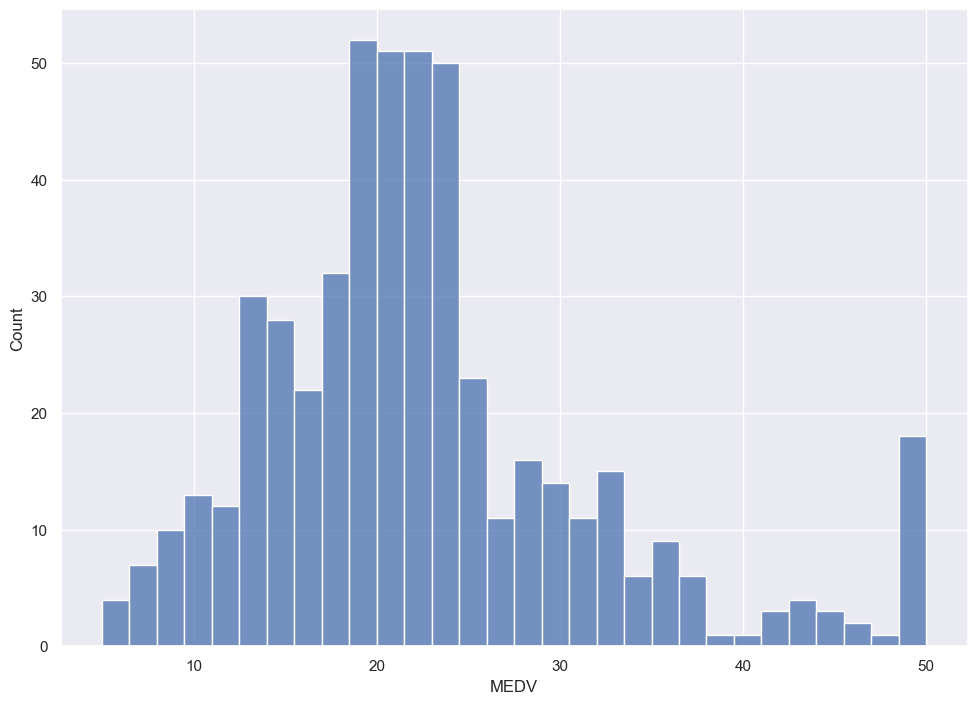

In [8]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.histplot(df['MEDV'], bins=30)
plt.show()

<AxesSubplot:>

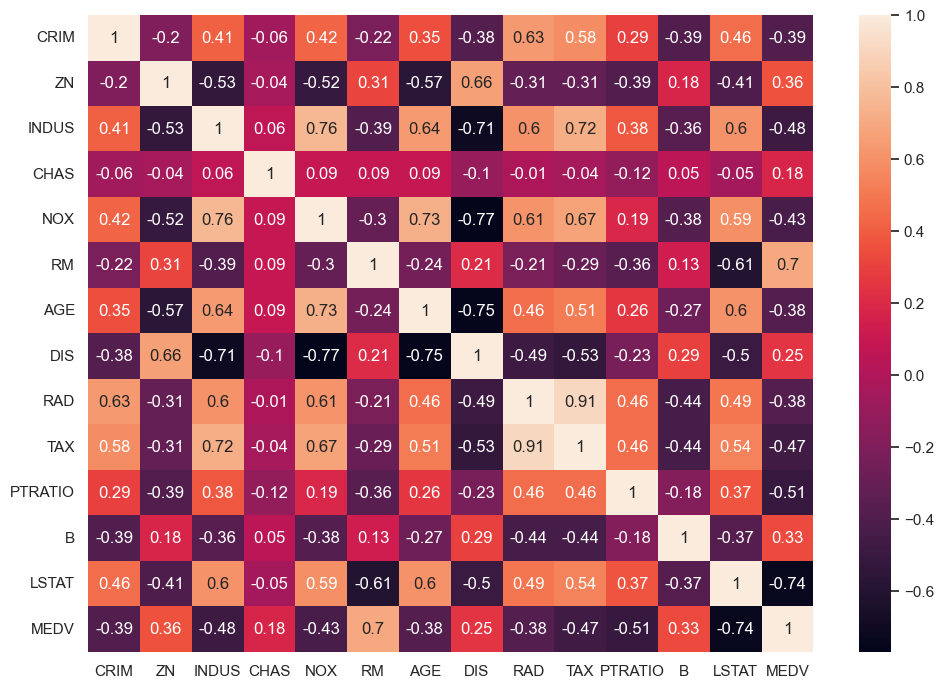

In [9]:

correlation_matrix = df.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

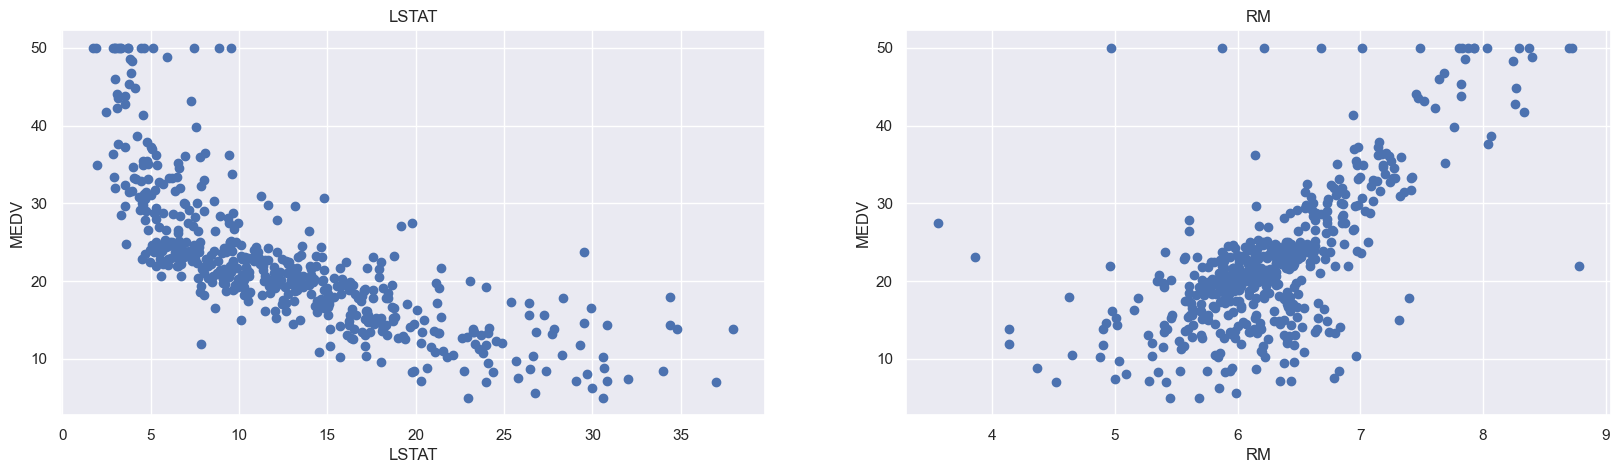

In [10]:
plt.figure(figsize=(20, 5))

features = ['LSTAT', 'RM']
target = df['MEDV']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = df[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')

In [11]:
X = pd.DataFrame(np.c_[df['LSTAT'], df['RM']], columns = ['LSTAT','RM'])
Y = df['MEDV']

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=SEED)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(404, 2)
(102, 2)
(404,)
(102,)


In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression()

In [14]:
# model evaluation for training set
y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print(f'MAE is {mean_absolute_error(Y_train, y_train_predict)}')
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
y_test_predict = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print(f'MAE is {mean_absolute_error(Y_test, y_test_predict)}')
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 5.496085641280111
MAE is 3.8999100716472053
R2 score is 0.6337739323804806


The model performance for testing set
--------------------------------------
RMSE is 5.634277122186755
MAE is 4.191647925947735
R2 score is 0.6498476787424093


## MLP aproach

In [15]:
from sklearn.neural_network import MLPRegressor

In [16]:
# Testing the defalt MLPRegression Hyperparameters
model_mlp_defalt = MLPRegressor(random_state=SEED)
MLPdefalt_regressor = model_mlp_defalt.fit(X_train, Y_train)
expected_y  = Y_test
predicted_y = MLPdefalt_regressor.predict(X_test)

print("The MLP Defalt Regressor performance for testing set")
print("--------------------------------------")
print(f'RMSE is {np.sqrt(mean_squared_error(expected_y, predicted_y))}')
print(f'MAE is {mean_absolute_error(expected_y, predicted_y)}')
print(f'R2 score is {r2_score(expected_y, predicted_y)}')

The MLP Defalt Regressor performance for testing set
--------------------------------------
RMSE is 5.103578848692117
MAE is 3.9295838219579298
R2 score is 0.7127035500494746


c:\Users\Willian Oliveira\anaconda3\envs\dl_env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [17]:
# Testing the tunned MLPRegression Hyperparameters

model_mlp_tunned = MLPRegressor(hidden_layer_sizes=(200,),
                            activation = 'relu',
                            solver = 'adam',
                            alpha = 0.0001,
                            batch_size = 'auto',
                            learning_rate = 'invscaling',
                            learning_rate_init = 0.001,
                            max_iter = 1000,
                            shuffle = True,
                            random_state = SEED,
                            tol = 0.0001,
                            verbose = False,
                            warm_start = False,
                            early_stopping = False
                            )

MLPtunned_regressor = model_mlp_tunned.fit(X_train, Y_train)
expected_y  = Y_test
predicted_y = MLPtunned_regressor.predict(X_test)

print("The MLP Tunned Regressor performance for testing set")
print("--------------------------------------")
print(f'RMSE is {np.sqrt(mean_squared_error(expected_y, predicted_y))}')
print(f'MAE is {mean_absolute_error(expected_y, predicted_y)}')
print(f'R2 score is {r2_score(expected_y, predicted_y)}')

The MLP Tunned Regressor performance for testing set
--------------------------------------
RMSE is 4.708679014957596
MAE is 3.6898039260524502
R2 score is 0.7554437456647639


In [18]:
# Test MLP using all Features from dataset

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

X = df.drop(columns=['MEDV'])
Y = df['MEDV']

In [19]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=SEED)

In [20]:
# Testing defalt MLPRegression with standardscaled values for all features
# We only have float features, so there is no need to build a stacked pipeline with Sklearn.Pipeline.FeatureUnion

defalt_mlp_pipe = Pipeline([('pre_proc', StandardScaler()),
                            ('model', MLPRegressor(random_state=SEED))])

MLPdefalt_regressor = defalt_mlp_pipe.fit(X_train, Y_train)
expected_y  = Y_test
predicted_y = MLPdefalt_regressor.predict(X_test)

print("The MLP Defalt Regressor performance for testing set")
print("--------------------------------------")
print(f'RMSE is {np.sqrt(mean_squared_error(expected_y, predicted_y))}')
print(f'MAE is {mean_absolute_error(expected_y, predicted_y)}')
print(f'R2 score is {r2_score(expected_y, predicted_y)}')

The MLP Defalt Regressor performance for testing set
--------------------------------------
RMSE is 5.55863303813646
MAE is 4.066296996218753
R2 score is 0.6591866403117922


c:\Users\Willian Oliveira\anaconda3\envs\dl_env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [21]:
# Testing the tunned MLPRegression Hyperparameters with standardscaled values for all features
# We only have float features, so there is no need to build a stacked pipeline with Sklearn.Pipeline.FeatureUnion

model_mlp_tunned = MLPRegressor(hidden_layer_sizes=(200,),
                            activation = 'relu',
                            solver = 'adam',
                            alpha = 0.0001,
                            batch_size = 'auto',
                            learning_rate = 'invscaling',
                            learning_rate_init = 0.001,
                            max_iter = 1000,
                            shuffle = True,
                            random_state = SEED,
                            tol = 0.0001,
                            verbose = False,
                            warm_start = False)

tunned_mlp_pipe = Pipeline([('pre_proc', StandardScaler()),
                            ('model', model_mlp_tunned)])

MLPtunned_regressor = tunned_mlp_pipe.fit(X_train, Y_train)
expected_y  = Y_test
predicted_y = MLPtunned_regressor.predict(X_test)

print("The MLP Tunned Regressor performance for testing set")
print("--------------------------------------")
print(f'RMSE is {np.sqrt(mean_squared_error(expected_y, predicted_y))}')
print(f'MAE is {mean_absolute_error(expected_y, predicted_y)}')
print(f'R2 score is {r2_score(expected_y, predicted_y)}')

The MLP Tunned Regressor performance for testing set
--------------------------------------
RMSE is 3.2701009555829694
MAE is 2.3922540743116456
R2 score is 0.8820486481052401
